# Problem 2a

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.cross_validation import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.preprocessing import OneHotEncoder
import copy
from typing import List

input_file = "network_backup_dataset.csv"

dataset = pd.read_csv(input_file, header = 0) 
indices = dataset.columns
for i, v in enumerate(indices):
    print (" Index[" + str(i) + "] " + v)

files = ['File_{0}'.format(x) for x in range(len((pd.unique(dataset['File Name']))))]



 Index[0] Week #
 Index[1] Day of Week
 Index[2] Backup Start Time - Hour of Day
 Index[3] Work-Flow-ID
 Index[4] File Name
 Index[5] Size of Backup (GB)
 Index[6] Backup Time (hour)


In [3]:
# all the functions for 2a
def scalarencoding(index, data):
    if index == indices[1]:
        return data.replace({'Day of Week': {'Monday' : 0, 'Tuesday' : 1, 'Wednesday' : 2, 'Thursday' : 3, 'Friday' : 4,'Saturday' : 5, 'Sunday' : 6}})
    elif index == indices[3]:
        return data.replace({'Work-Flow-ID': {'work_flow_0' : 0, 'work_flow_1' : 1, 'work_flow_2' : 2, 'work_flow_3' : 3, 'work_flow_4' : 4}})
    elif index == indices[4]:
        for i,j in zip(files,range(len(files))):
            data = data.replace({'File Name': {i : j}})
        return data
    else:
        return data

def twoplots(training):
    predict = cross_val_predict(linearregression, training, target, cv = 10)


    fig, ax = plt.subplots()
    ax.scatter(target, predict)
    ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw = 4)
    ax.set_xlabel('True')
    ax.set_ylabel('Fitted')
    plt.title('Fitted values vs. Actual values')
    plt.show()



    fig, ax = plt.subplots()
    ax.scatter(predict, predict-target)
    ax.set_xlabel('Fitted')
    ax.set_ylabel('Residual')
    plt.title('Residuals vs. Fitted value')
    plt.show()


ONE_HOT = True
SCALAR = False

def all_encoding_masks(n_features):
    results = []
    mask = [ONE_HOT] * n_features
    helper(0, mask, results)
    return results


def helper(start, mask, mask_list):
    mask_list.append(copy.deepcopy(mask))
    i = start
    while i < len(mask):
        mask[i] = SCALAR
        helper(i + 1, mask, mask_list)
        mask[i] = ONE_HOT
        i = i + 1

In [4]:
for i in range(len(indices)):    
    dataset = scalarencoding(indices[i], dataset)
    
    
#print dataset  
linearregression = LinearRegression()
training = dataset.copy()
training.drop('Backup Time (hour)', axis=1,inplace = True)
trainingdata = training.copy()
target = training.pop(indices[5])
linearregression.fit(training,target)    

# number of splits in corss validation
KFOLD = 10
kf = KFold(n_splits = KFOLD, shuffle = True, random_state = 42)
kf.get_n_splits(trainingdata)

for trainset, testset in kf.split(trainingdata):
    train_set = trainingdata.iloc[trainset, :]
    test_set = trainingdata.iloc[testset, :]
    
    train_target = train_set.pop(indices[5])
    test_target = test_set.pop(indices[5])
    
    train_predict = linearregression.predict(train_set)
    test_predict = linearregression.predict(test_set)
    print ("RMSE for Training Data: ", sqrt(mean_squared_error(train_target, train_predict)))
    print ("RMSE for Testing Data: ", sqrt(mean_squared_error(test_target, test_predict)))

('RMSE for Training Data: ', 0.1033855511267813)
('RMSE for Testing Data: ', 0.10541077511390294)
('RMSE for Training Data: ', 0.10458656784362276)
('RMSE for Testing Data: ', 0.0941472161531634)
('RMSE for Training Data: ', 0.10330817513187095)
('RMSE for Testing Data: ', 0.10609124609667478)
('RMSE for Training Data: ', 0.10328148408682084)
('RMSE for Testing Data: ', 0.10632484851215361)
('RMSE for Training Data: ', 0.10391919121586904)
('RMSE for Testing Data: ', 0.10057790729763391)
('RMSE for Training Data: ', 0.10403774495114905)
('RMSE for Testing Data: ', 0.0994688660654486)
('RMSE for Training Data: ', 0.10268010484908041)
('RMSE for Testing Data: ', 0.11144321139403808)
('RMSE for Training Data: ', 0.10259429238617493)
('RMSE for Testing Data: ', 0.11215215704141318)
('RMSE for Training Data: ', 0.10487370887063496)
('RMSE for Testing Data: ', 0.09121963050062146)
('RMSE for Training Data: ', 0.10320712556058104)
('RMSE for Testing Data: ', 0.10697462573309999)


Fitted values vs. Actual values:


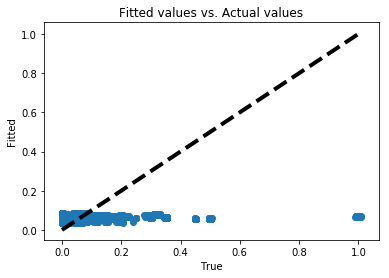

Residuals vs. Fitted value


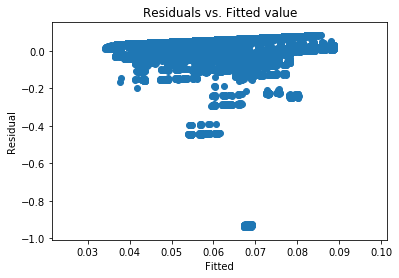

In [40]:
twoplots(training)

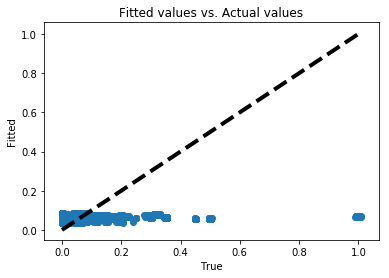

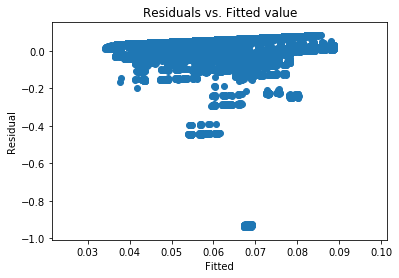

In [44]:
# (ii) standardize

scaler = StandardScaler(copy = False, with_mean=False, with_std=True)
scaler.fit(training)
training_fitted = scaler.transform(training)
linearregression.fit(training_fitted,target)

twoplots(training_fitted)


In [49]:
# (iii) using f regression and mutual information regression measure to determine 3 most important features
best_fregression = SelectKBest(f_regression, k=3)  #using selectkbest two select 3 most important variables
best_fregression_fitted = best_fregression.fit_transform(training_fitted,target)
print("f_regression: " + str(best_fregression.get_support()))


f_regression: [False  True  True  True False]


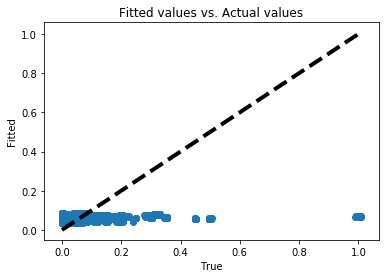

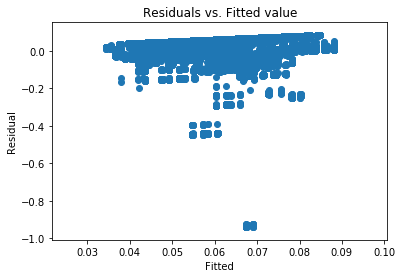

In [54]:
# Thus we select  Day of Week, Backup Start Time - Hour of Day, Work-Flow-ID as our 3 most important features

training_fregression = training.iloc[:,1:4]

linearregression = LinearRegression()
linearregression.fit(training_fregression,target)

twoplots(training_fregression)

In [56]:
best_mir = SelectKBest(mutual_info_regression, k=3)  #using selectkbest two select 3 most important variables
best_mir_fitted = best_mir.fit_transform(training_fitted,target)
print(" mutual_info_regression: " + str(best_mir.get_support()))

 mutual_info_regression: [False False  True  True  True]


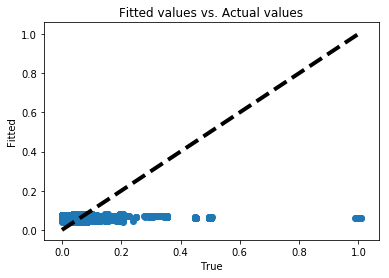

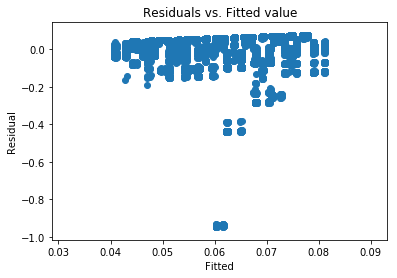

In [57]:
# Thus we select Backup Start Time - Hour of Day, Work-Flow-ID, File Name as our 3 most important features
training_mir = training.iloc[:,2:5]

linearregression = LinearRegression()
linearregression.fit(training_mir,target)

twoplots(training_mir)

In [17]:
# (iv) Applying 32 combinations 
kf = KFold(n_splits=10, random_state=0, shuffle=True)
regr = LinearRegression()
mask_list = all_encoding_masks(5)

labels = dataset['Size of Backup (GB)'].as_matrix()
avg_train_rmse = []
avg_test_rmse = []

for mask in mask_list:
    enc = OneHotEncoder(categorical_features=mask, sparse=False)
    encoded_features = enc.fit_transform(training)
    
    train_mse_list = []
    test_mse_list = []

    # Perform linear regression
    for train_index, test_index in kf.split(encoded_features):
        X_train, X_test = encoded_features[train_index], encoded_features[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        regr.fit(X_train, y_train)

        # Compute mse for training set
        y_train_pred = regr.predict(X_train)
        train_mse_list.append(mean_squared_error(y_train, y_train_pred))

        # Compute mse for test set
        y_test_pred = regr.predict(X_test)
        test_mse_list.append(mean_squared_error(y_test, y_test_pred))

    avg_train_rmse.append(np.sqrt(np.mean(train_mse_list)))
    avg_test_rmse.append(np.sqrt(np.mean(test_mse_list)))


In [15]:
print mask_list[16]

[False, True, True, True, False]


Text(0,0.5,u'Train RMSE')

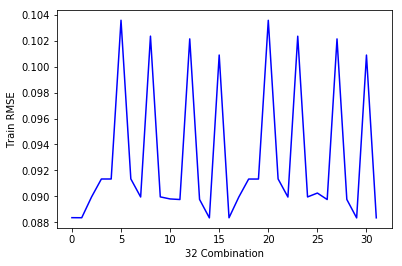

In [18]:
plt.figure()
plt.plot(range(0,len(avg_train_rmse)),avg_train_rmse, color = 'blue', label = 'Train RSME')
plt.legend
plt.xlabel('32 Combination')
plt.ylabel('Train RMSE')

Text(0,0.5,u'Test RMSE')

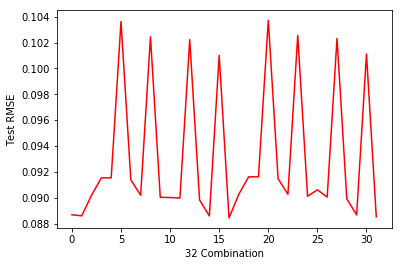

In [19]:
plt.figure()
plt.plot(range(0,len(avg_test_rmse)),avg_test_rmse, color = 'red', label = 'Test RSME')
plt.legend
plt.xlabel('32 Combination')
plt.ylabel('Test RMSE')

In [20]:
print avg_train_rmse
print avg_test_rmse

[0.0883504225134136, 0.08834543340348432, 0.08994931835382662, 0.09133534466052136, 0.09133514836327572, 0.10358785688545552, 0.0913442237293493, 0.08994619278169247, 0.10236173552722869, 0.08995478730648146, 0.0897954734974718, 0.08975192035300569, 0.10215018581773144, 0.08975889667101529, 0.08833368208196284, 0.10090327007275081, 0.08834089688976887, 0.08994613746681995, 0.0913312764305179, 0.09133175533556244, 0.10358319286715656, 0.09133994406201858, 0.08994146253784716, 0.102356714198818, 0.08995045986290756, 0.09025000345086949, 0.08975025244920942, 0.10214804155006828, 0.08975650899109192, 0.08833129690260076, 0.10090061286862086, 0.08833826922330466]
[0.08868323494999694, 0.08860032129854367, 0.09019561727588227, 0.09153614315093203, 0.09153642349690652, 0.10362789673661559, 0.09138685373424893, 0.09019271812623644, 0.10244966281382929, 0.09003370260280988, 0.09001617187633781, 0.0899762632789065, 0.10221988970281136, 0.08982728056924004, 0.08859025218559931, 0.1010154198861034

In [21]:
print 'Best Performance Combination:', np.argmin(avg_test_rmse)

Best Performance Combination: 16


In [24]:
# Using the best model to calculate training & test RMSE and plotting
kf = KFold(n_splits=10, random_state=0, shuffle=True)
regr = LinearRegression()

labels = dataset['Size of Backup (GB)'].as_matrix()
avg_train_rmse = []
avg_test_rmse = []

enc = OneHotEncoder(categorical_features=mask_list[16], sparse=False)
encoded_features_16 = enc.fit_transform(training)
    
train_mse_list = []
test_mse_list = []

# Perform linear regression
for train_index, test_index in kf.split(encoded_features_16):
    X_train, X_test = encoded_features[train_index], encoded_features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    regr.fit(X_train, y_train)

    # Compute mse for training set
    y_train_pred = regr.predict(X_train)
    train_mse_list.append(mean_squared_error(y_train, y_train_pred))

    # Compute mse for test set
    y_test_pred = regr.predict(X_test)
    test_mse_list.append(mean_squared_error(y_test, y_test_pred))

avg_train_rmse_16 = np.sqrt(np.mean(train_mse_list))
avg_test_rmse_16 = np.sqrt(np.mean(test_mse_list))

print 'Best Model Training RMSE:', avg_train_rmse_16
print 'Best Model Testing RMSE:', avg_test_rmse_16

Best Model Training RMSE: 0.08834089688976887
Best Model Testing RMSE: 0.08843953422539727


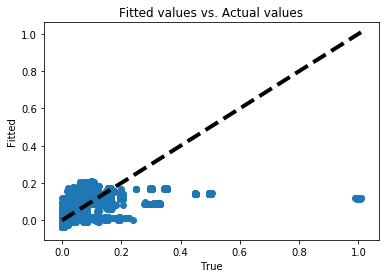

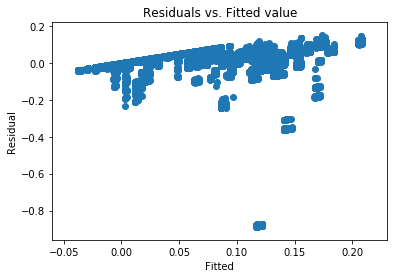

In [25]:
twoplots(encoded_features_16)